# Results

***Import Libraries***

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Add the project root to the Python path
project_root = os.path.abspath("..")  # Adjust ".." if your notebooks are more deeply nested
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    

from src.CustomLogisticRegression import CustomLogisticRegression
from src.train_model import split_train_test
from src.evaluate import Metrics
from src.feature_engineering import FeatureEngineering
from src.data_preprocessing import DataPreprocessor

# Test the preprocessing
file_path = (
    "../data/raw/risk-train.txt"  # Adjust the path based on your directory structure
)

***Data Preprocessing***

We took the following data preprocessing steps
- Basic data exploration for missing values and incorrect data types
- Handling missing values - We dropped any columns with more than 50% missing values.
For missing values in other numeric columns we repaced the value with the mean and for 
categorical columns, we replaced with mode.
- Data transformation - We converted categorical columns with binary outcomes with 1 and 0, for more than
two outcomes we performed one hot encoding.

We built a class to handle all the preprocessing steps which is initiated below for data preprocessing

In [2]:
data_preprocessor = DataPreprocessor(file_path)
data = data_preprocessor.preprocess_data()

Data loaded successfully.


***Feature Engineering***

We did the following feature engineering to improve the training performance
- We used standard scalar to scale our columns.

In [3]:
feature_engineer = FeatureEngineering()
df = feature_engineer.standardize_features(data, target_column="Class")

***Hyperparameter Analysis***

Importing csv generated by our hyperparameter tuning file

In [4]:
hyper_data = pd.read_csv('../data/transformed//hyperparameter_final_final.csv')

We are looking into the combination learning rate, epoch and test_size that gives us the best accuracy.

In [5]:
hyper_data.loc[hyper_data['accuracy'] == hyper_data['accuracy'].max(),:]


,Unnamed: 0,learning_rate,epochs,test_size,accuracy,precision,recall
13,13,0.01,500,0.25,0.823867,0.164519,0.497706


We are looking into the combination learning rate, epoch and test_size that gives us the best recall.

In [6]:
hyper_data.loc[hyper_data['recall'] == hyper_data['recall'].max(),:]

,Unnamed: 0,learning_rate,epochs,test_size,accuracy,precision,recall
2,2,0.001,100,0.3,0.735222,0.128942,0.616412


***Training model***

We are identifying the columns for the independent and dependent variables and spliting it into training and testing dataset

In [7]:
#These are the independent variables
ind = df.columns.difference(['Class']).tolist()

# These are the dependent variables
dep = ["Class"]

#Splitting the dataset
train_dataset, test_dataset = split_train_test(df,ind,dep,test_size = 0.25)

We will use the following values for our hyperparameters as it gave us the best accuracy.

In [8]:
learning_rate= 0.01
num_epochs = 1000

# Gradient decsent without class weights

Here we are initializing our custom logistic regression model and training the model

In [9]:
# Bringing in the algorithm
clr = CustomLogisticRegression(learning_rate,num_epochs,isBalanced=True)

# Getting the training data in matrix form
x_train, y_train = clr.load_data(train_dataset,ind,dep) 

# Training the model
theta, J_all, J = clr.fit(x_train,y_train)

We are plotting the cost with number of epochs. The cost stabilizes after around 400 epochs.

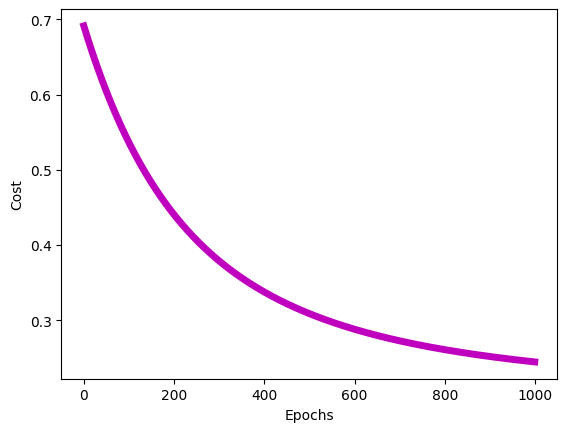

In [10]:
clr.plot_cost(J_all)

***Testing our model***

Let us see the predicted values with our testing data. We first have to load the data to load_data function to get the test datasets as arrays. The predict function takes the x_test array and the theta from our trained model to get the predicted y.

In [11]:
# Getting the testing data to matrix form
x_test, y_test = clr.load_data(test_dataset,ind,dep) 

# Get the y predicted values
y_pred = clr.predict(x_test)

***Results***

We have an evaluate_model fucntion in the Metrics class that we can use to see the confusion metrics and calculate the metrics. We get the following metrics results, score and confusion metrics.

Accuracy - 94.19%
Recall - 0.00%
Precision - 0.00%
Our total score with 50 for false negative and 5 for false positive - 21800


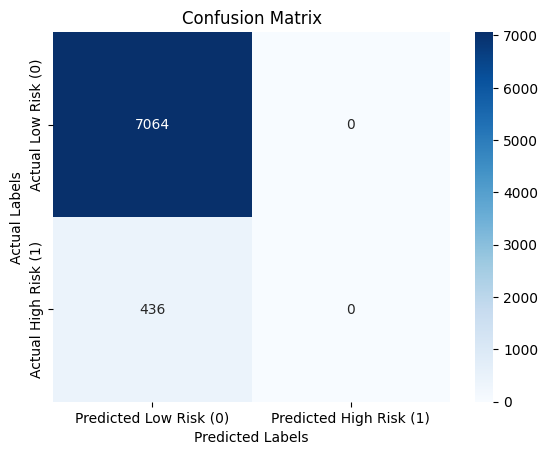

In [12]:
#Evaluating the models
mt = Metrics()
y_pred, confusion_matrix, accuracy, precision, recall = mt.evaluate_model(y_pred,y_test, True)

# Gradient decsent with class weights

Here we are initializing our custom logistic regression model and training the model

In [13]:
# Bringing in the algorithm
clr = CustomLogisticRegression(learning_rate,num_epochs,isBalanced=False)

# Getting the training data in matrix form
x_train, y_train = clr.load_data(train_dataset,ind,dep) 

# Training the model
theta, J_all, J = clr.fit(x_train,y_train)

We are plotting the cost with number of epochs. The cost stabilizes after around 400 epochs.

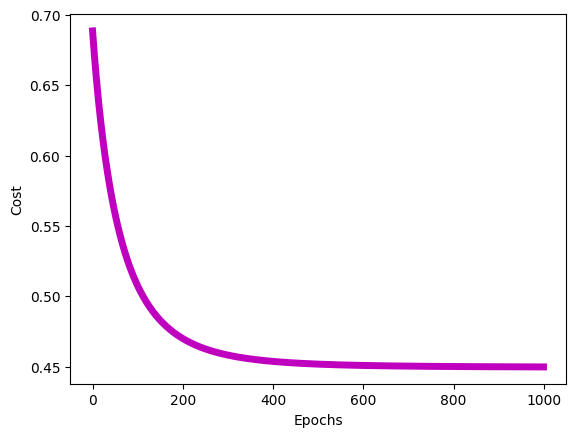

In [14]:
clr.plot_cost(J_all)

***Testing our model***

Let us see the predicted values with our testing data. We first have to load the data to load_data function to get the test datasets as arrays. The predict function takes the x_test array and the theta from our trained model to get the predicted y.

In [15]:
# Getting the testing data to matrix form
x_test, y_test = clr.load_data(test_dataset,ind,dep) 

# Get the y predicted values
y_pred = clr.predict(x_test)

***Results***

We have an evaluate_model fucntion in the Metrics class that we can use to see the confusion metrics and calculate the metrics. We get the following metrics results, score and confusion metrics.

Accuracy - 82.21%
Recall - 50.00%
Precision - 16.34%
Our total score with 50 for false negative and 5 for false positive - 16480


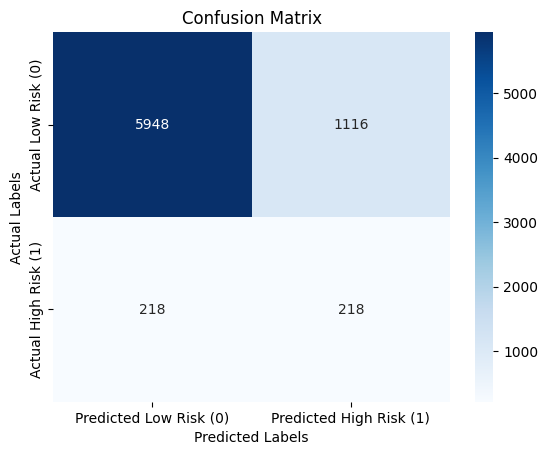

In [16]:
#Evaluating the models
mt = Metrics()
y_pred, confusion_matrix, accuracy, precision, recall = mt.evaluate_model(y_pred,y_test, True)

# Gradient decsent with selective class weights 

Here we are initializing our custom logistic regression model and training the model

In [17]:
# Bringing in the algorithm
clr = CustomLogisticRegression(learning_rate,num_epochs,isBalanced=False, type='B')

# Getting the training data in matrix form
x_train, y_train = clr.load_data(train_dataset,ind,dep) 

# Training the model
theta, J_all, J = clr.fit(x_train,y_train)

We are plotting the cost with number of epochs. The cost stabilizes after around 400 epochs.

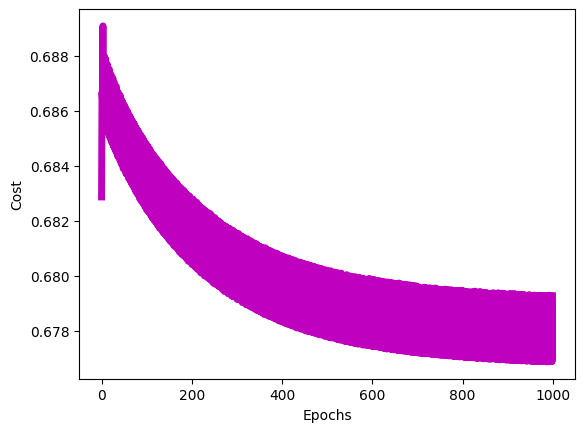

In [18]:
clr.plot_cost(J_all)

***Testing our model***

Let us see the predicted values with our testing data. We first have to load the data to load_data function to get the test datasets as arrays. The predict function takes the x_test array and the theta from our trained model to get the predicted y.

In [19]:
# Getting the testing data to matrix form
x_test, y_test = clr.load_data(test_dataset,ind,dep) 

# Get the y predicted values
y_pred = clr.predict(x_test)

***Results***

We have an evaluate_model fucntion in the Metrics class that we can use to see the confusion metrics and calculate the metrics. We get the following metrics results, score and confusion metrics.

Accuracy - 65.71%
Recall - 66.28%
Precision - 10.65%
Our total score with 50 for false negative and 5 for false positive - 19475


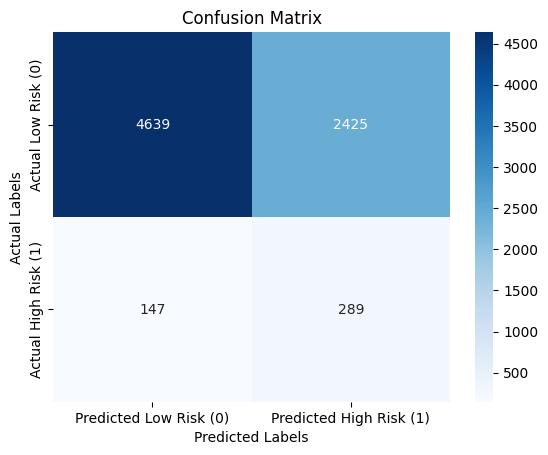

In [21]:
#Evaluating the models
mt = Metrics()
y_pred, confusion_matrix, accuracy, precision, recall = mt.evaluate_model(y_pred,y_test, True)